# Analysis of the Voice Signal

## Libraries Import

In [1]:
import math

import librosa
import librosa.display
import matplotlib.pyplot as pyplot
import numpy as np
from scipy import signal
from scipy.fft import fft
from scipy.io import wavfile

## Configuration

In [2]:
SOUNDS_FOLDER = "sounds/"
A_SOUND_FILENAME = SOUNDS_FOLDER + "a.wav"
WHISTLE_SOUND_FILENAME = SOUNDS_FOLDER + "whistle.wav"
SARE_SOUND_FILENAME = SOUNDS_FOLDER + "sare.wav"
SOUNDS_FILES = [A_SOUND_FILENAME, WHISTLE_SOUND_FILENAME, SARE_SOUND_FILENAME]
SOUNDS_COUNT = 3
FRAME_LENGTH = 25
STEP_LENGTH = 10

## Frame Splitting

In [3]:
points_in_frame = []
all_samples = []
durations = []
rates = []
for current_file in SOUNDS_FILES:
    # Read the frames of the signal
    sample_rate, data = wavfile.read(current_file)
    points_in_ms = int(sample_rate / 1000)
    current_points_in_frame = FRAME_LENGTH * points_in_ms
    points_in_step = STEP_LENGTH * points_in_ms
    points_in_sound = len(data)
    current_samples = [
        data[start:start + current_points_in_frame]
        for start in range(0, points_in_sound - current_points_in_frame, current_points_in_frame + points_in_step)
    ]

    # Computing the duration of the sound in milliseconds
    duration = int(len(data) / points_in_ms)
    durations.append(duration)

    # Save the sampling rate, the frames count and the frames
    rates.append(sample_rate)
    points_in_frame.append(current_points_in_frame)
    all_samples.append(current_samples)

    print("[+] {} frame were read from the file './{}'.".format(len(current_samples), current_file))

[+] 75 frame were read from the file './sounds/a.wav'.
[+] 90 frame were read from the file './sounds/whistle.wav'.
[+] 65 frame were read from the file './sounds/sare.wav'.


## Discrete Fourier Transform with Hamming Window

In [4]:
all_transformed_samples = SOUNDS_COUNT * [None]
def tfd_with_hamming(index: int):
    filename = SOUNDS_FILES[index]
    current_points_in_frame = points_in_frame[index]
    current_samples = all_samples[index]

    # Create the Hamming window matching the sampling rate of the signal
    hamming_window = signal.windows.hamming(current_points_in_frame)
    
    # Compute the Fourier transform
    transformed_samples = [
        np.square(np.abs(fft(hamming_window * sample))) for sample in current_samples
    ]
    transformed_samples = np.array(transformed_samples).T

    # Save the results
    all_transformed_samples[index] = transformed_samples

    # Plot
    pyplot.xlabel("Time (ms)")
    pyplot.ylabel("Frequency (Hz)")
    pyplot.title("Discrete Fourier Transform with Hamming Window for the File '{}'".format(filename))
    pyplot.imshow(np.abs(transformed_samples), extent=[0, durations[index], 0, rates[index]])
    pyplot.show()

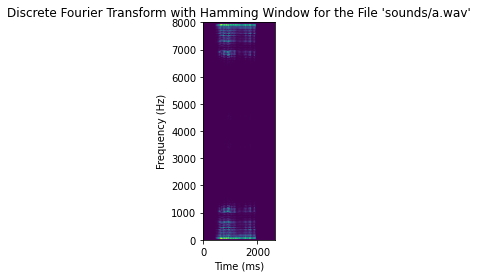

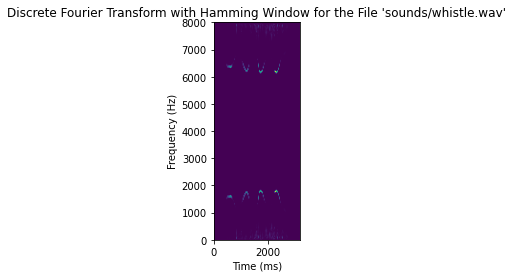

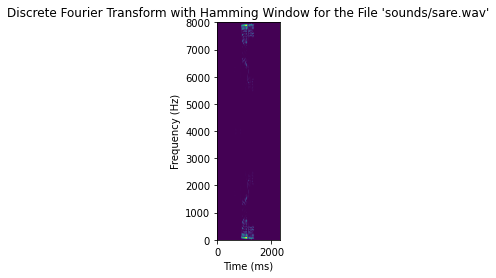

In [5]:
tfd_with_hamming(0)
tfd_with_hamming(1)
tfd_with_hamming(2)

## Discrete Fourier Transform with Hamming Window, in Decibels

In [6]:
def db_tfd_with_hamming(index: int):
    filename = SOUNDS_FILES[index]

    # Convert the signal in decibels
    transformed_samples = [
        10 * np.log10(sample) for sample in all_transformed_samples[index]
    ]
    transformed_samples = np.array(transformed_samples)

    # Plot
    pyplot.xlabel("Time (ms)")
    pyplot.ylabel("Frequency (Hz)")
    pyplot.title("Discrete Fourier Transform with Hamming Window, in Decibels, for the File '{}'".format(filename))
    pyplot.imshow(transformed_samples, extent=[0, durations[index], 0, rates[index]])
    pyplot.show()

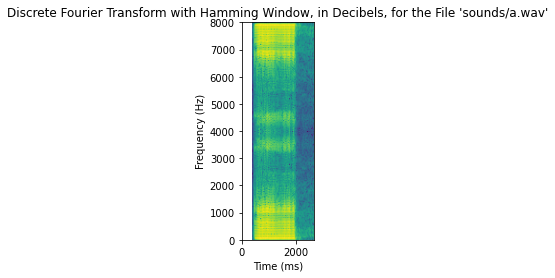

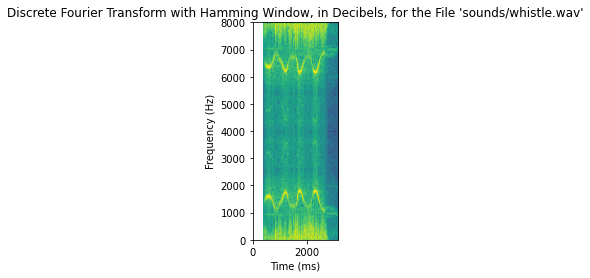

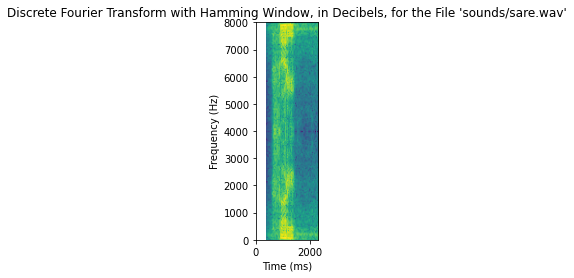

In [7]:
db_tfd_with_hamming(0)
db_tfd_with_hamming(1)
db_tfd_with_hamming(2)

## Spectogram

In [8]:
def spectogram(index: int):
    # Read the signal
    filename = SOUNDS_FILES[index]
    data, _ = librosa.load(filename)

    # Compute the Fourier transform and convert it to decibels
    transform = librosa.stft(data)
    db_transform = librosa.amplitude_to_db(np.abs(transform), ref=np.max)

    # Plot
    pyplot.figure()
    librosa.display.specshow(db_transform, x_axis='time', y_axis='log')
    pyplot.xlabel("Time (ms)")
    pyplot.ylabel("Frequency (Hz)")
    pyplot.title("Spectogram of the File '{}'".format(filename))
    pyplot.colorbar()
    pyplot.show()

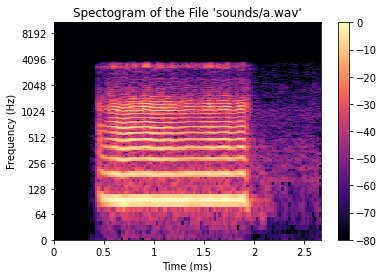

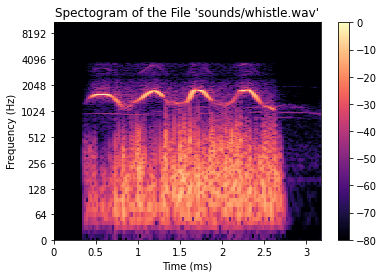

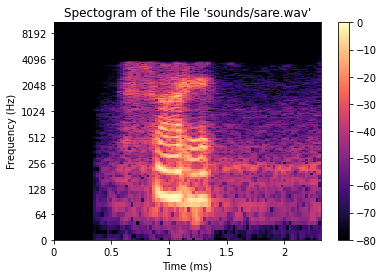

In [9]:
spectogram(0)
spectogram(1)
spectogram(2)